NAME: Talari Jahnavi
Roll Number :  1950568

Dataset Preview:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1

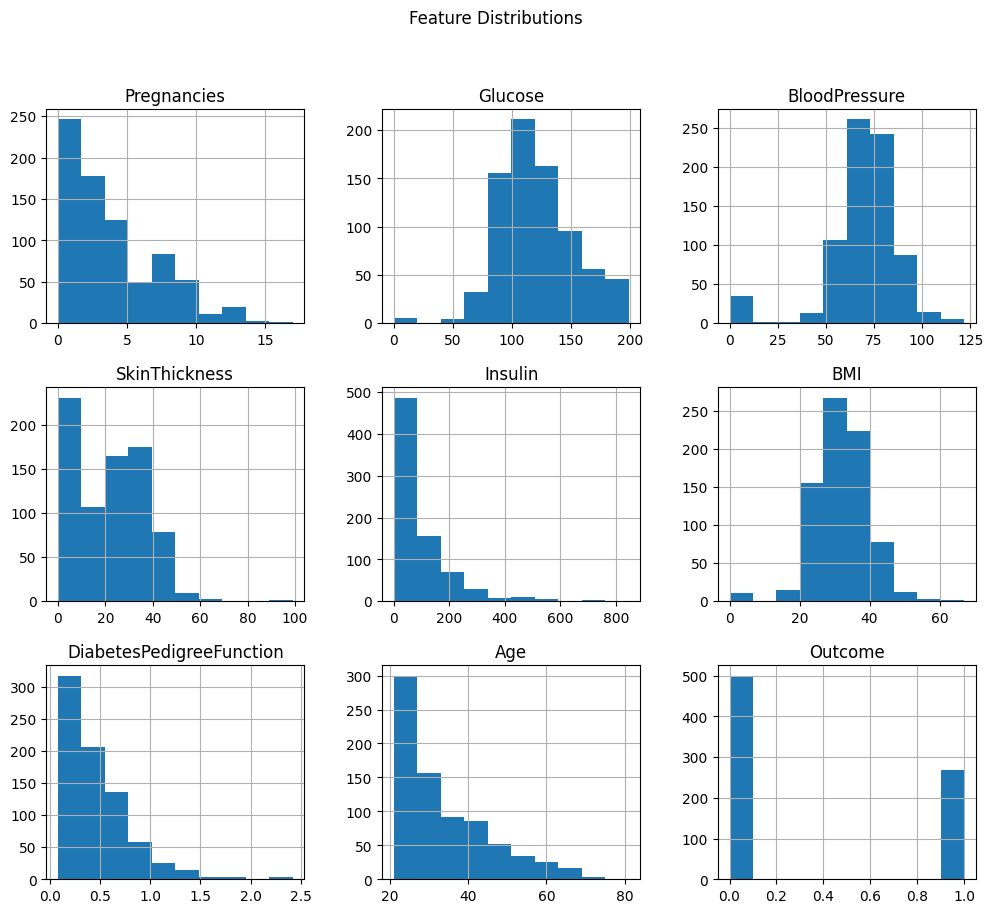

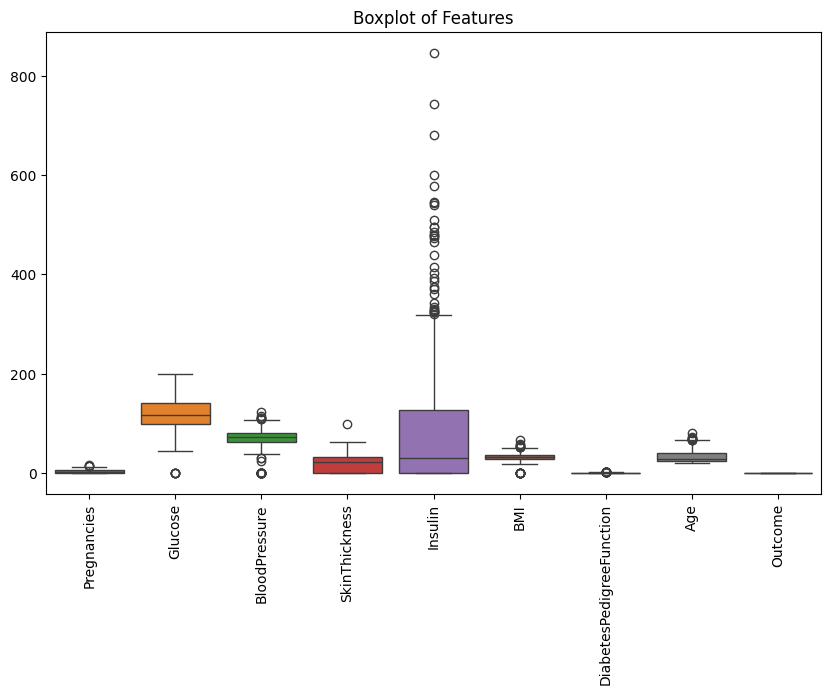

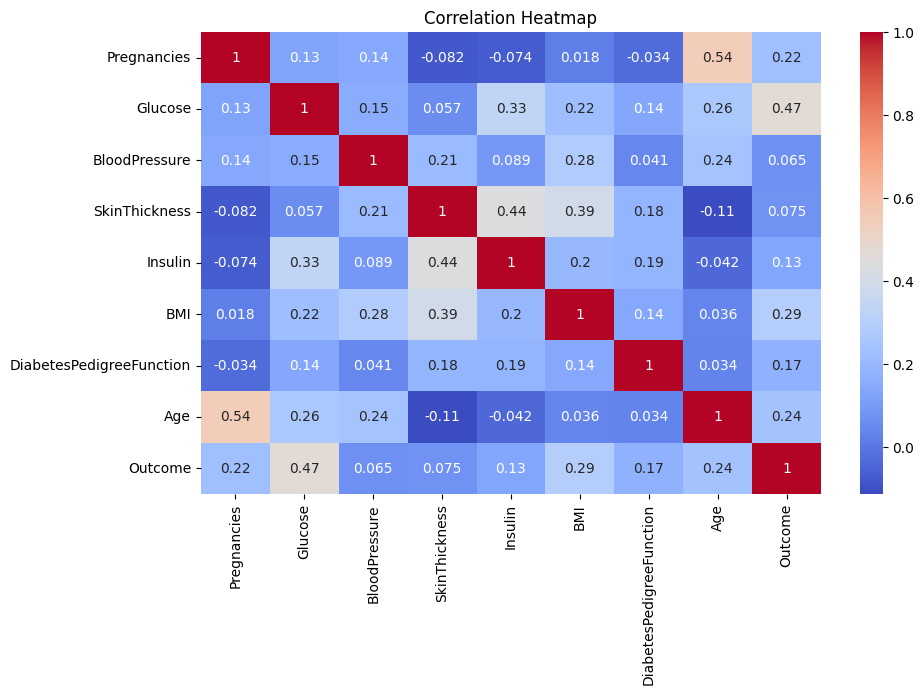


Evaluation Metrics:
Accuracy: 0.7142857142857143
Precision: 0.6086956521739131
Recall: 0.5185185185185185
F1 Score: 0.56
ROC-AUC: 0.8229629629629629

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



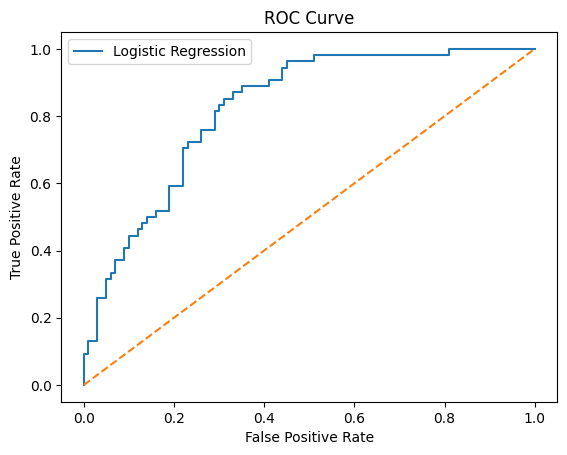


Logistic Regression Coefficients:
                    Feature  Coefficient
1                   Glucose     1.144151
5                       BMI     0.713893
0               Pregnancies     0.373178
6  DiabetesPedigreeFunction     0.255527
7                       Age     0.184179
3             SkinThickness     0.066535
4                   Insulin    -0.127308
2             BloodPressure    -0.197637

Model and scaler saved successfully.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve, classification_report
)

import joblib

# -----------------------------
# 1. Load Dataset
# -----------------------------
df = pd.read_csv('diabetes (3).csv')

print("Dataset Preview:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

# -----------------------------
# 2. EDA Visualizations
# -----------------------------
df.hist(figsize=(12,10))
plt.suptitle('Feature Distributions')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('Boxplot of Features')
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# -----------------------------
# 3. Data Preprocessing
# -----------------------------
for col in df.columns:
    df[col] = df[col].fillna(df[col].median())

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------
# 4. Logistic Regression Model
# -----------------------------
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# -----------------------------
# 5. Model Evaluation
# -----------------------------
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:,1]

print("\nEvaluation Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# -----------------------------
# 6. Coefficient Interpretation
# -----------------------------
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("\nLogistic Regression Coefficients:")
print(coef_df)

# -----------------------------
# 7. Save Model & Scaler
# -----------------------------
joblib.dump(model, 'logistic_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("\nModel and scaler saved successfully.")

# 1. What is the difference between precision and recall?

Precision

Precision measures how many of the predicted positive cases are actually positive.

When precision is important

When false positives are costly

Examples:

Spam detection (don’t mark important emails as spam)

Fraud alerts (avoid unnecessary customer blocks)

Recall

Recall measures how many of the actual positive cases are correctly identified.

When recall is important

When false negatives are costly

Examples:

Disease detection (don’t miss sick patients)

Security threats


# 2. What is Cross-Validation and why is it important in Binary Classification?

Cross-Validation:

Cross-validation is a technique used to evaluate a model’s performance more reliably by dividing the dataset into multiple subsets (folds).

Most common method: K-Fold Cross-Validation

Data is split into K folds

Model is trained K times

Each fold is used once as a test set

Final performance is the average of all runs

Why it is important in Binary Classification:

Prevents Overfitting

Ensures the model generalizes well to unseen data

Reliable Performance Estimate

Performance is not dependent on a single train-test split

Handles Class Imbalance Better

Especially useful when one class is rarer than the other

Model Selection & Tuning

Helps choose the best model and hyperparameters

Example:

In medical diagnosis:

A single train-test split may miss rare disease cases

Cross-validation ensures every sample gets tested